# t-SNE

1.There is a class of algorithms for visualization called "Manifold learning algorithm" that allow for more complex mappings
 also provide better visualization.
2.Particularly useful one is the "t-SNE" algorithm.<br>
3.These algorithms cannot be applied to a test set rather they can transform the data they were trained on.<br>
4.t-SNE is used to find a two-dimensional representation of the data that preserves the distances b/w points as best as possible.

NOTE: We will apply the t-SNE manifold learning algorithm on a dataset of handwritten digits<br>
->Each data point in this dataset is an 8X8 gray-scale images, digits b/w 0 to 9

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

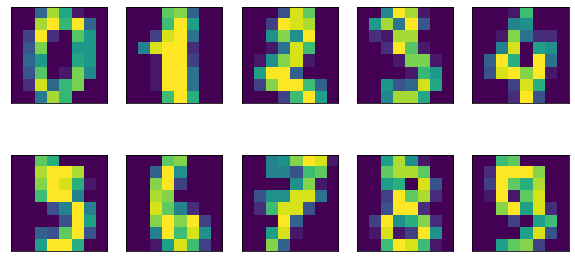

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [12]:
#Lets use PCA to visualize the data reduces to two dimensions.
#We plot the first two principle components, and represent each sample with a digit corresponding to its class.

Text(0, 0.5, 'Second principal component')

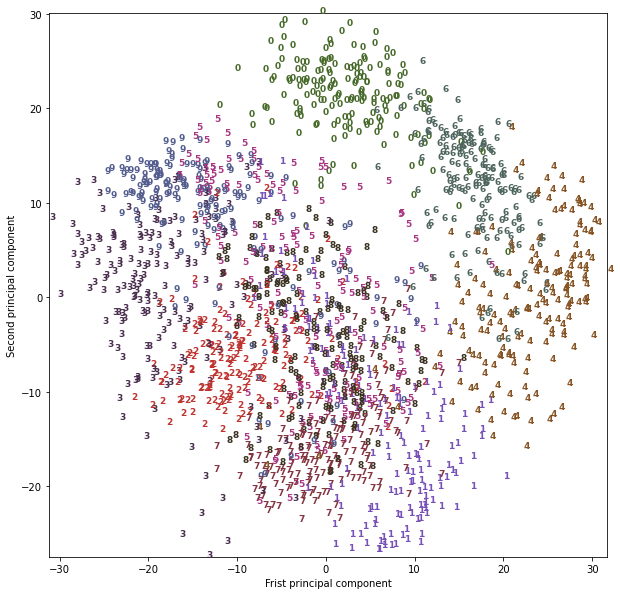

In [19]:
from sklearn.decomposition import PCA

#build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

#transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    #actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Frist principal component")
plt.ylabel("Second principal component")

In [20]:
#Here, we actually used the true digit classes as glyphs, to show which class is where.
#The digits zero, six and four are relatively well seperated using first two principal components, though they still overlap.

In [21]:
#Lets apply t-SNE to the same dataset and compare the results.
#As t-SNE does not support transforming new data, the TSNE class has no transform method
#Instead, we can call the fit_transform method, which will build the model and immediately return the transformed data

Text(0, 0.5, 't-SNE feature 1')

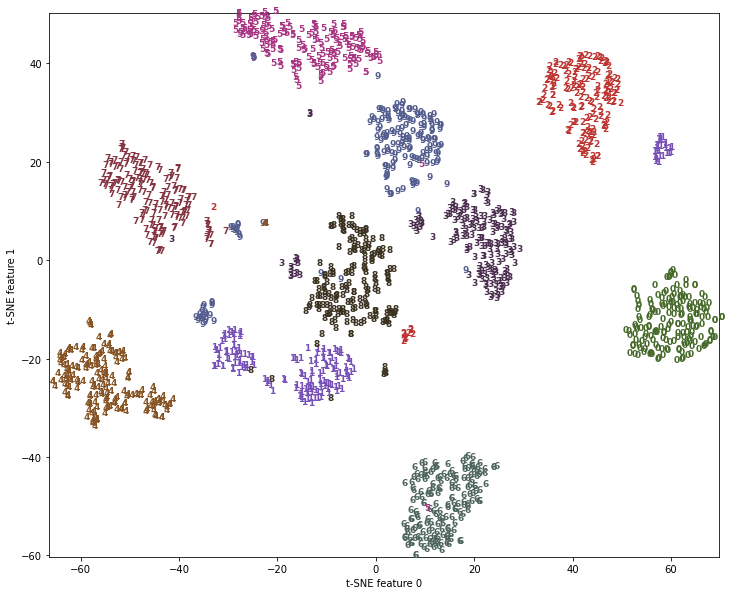

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
#use fit_transform instead fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(12,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    #actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

*The result of t-SNE is quite remarkable. All the classes are clearly separated.<br>
*t-SNE algorithm has some tuning parameters, though it works well with the default settings.<br>
*You can try with 'perplexity' and 'early_exaggeration' but the effects are usually minor.